<a href="https://colab.research.google.com/github/rodrigowe1988/Portfolio-Data-Science/blob/main/Pr%C3%A1tica_em_Python_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Desafio de Data Science extraído do kaggle

##Para mais desafios como esse acesse o link: [Kaggle](https://www.kaggle.com/)

In [1]:
#importando minhas bibliotecas para uso
import pandas as pd
import seaborn as sns
import statistics as sts

In [2]:
#salvando na variável dataset os dados para manipulação
dataset = pd.read_csv('Churn.csv', sep=';')
#tamanho do nosso dataset
print(f'O dataset possui {dataset.shape[0]} linhas e {dataset.shape[1]} colunas.')

O dataset possui 999 linhas e 12 colunas.


In [3]:
#alterando o nome das colunas do nosso dataset
dataset.columns = ['Id', 'Score','Estado', 'Genero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartaoCredito', 'Ativo', 'Salario', 'Saiu']
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


##Estado

In [4]:
#explorar dados categóricos
agrupado_estado = dataset.groupby(['Estado']).size()
agrupado_estado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

In [5]:
#outra forma de visualizar os dados da coluna Estado de forma agrupada 
dataset.Estado.value_counts()

RS    478
SC    258
PR    257
SP      4
TD      1
RP      1
Name: Estado, dtype: int64

###Note que temos prováveis erros de digitação na coluna Estado e precisamos dar um jeito de padronizar as respostas obtidas


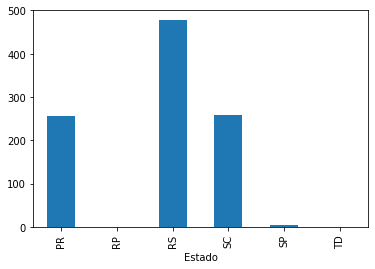

In [6]:
#plotando os dados da coluna Estado numa coluna
#dentro dos parênteses é possível escolher a cor color = 'orange'
agrupado_estado.plot.bar();

##Gênero

In [7]:
#Coluna Genero
agrupado_genero = dataset.groupby(['Genero']).size()
agrupado_genero

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [8]:
#da mesma forma, temos value_counts para extrair dados únicos
dataset.Genero.value_counts()

Masculino    521
Feminino     461
M              6
F              2
Fem            1
Name: Genero, dtype: int64

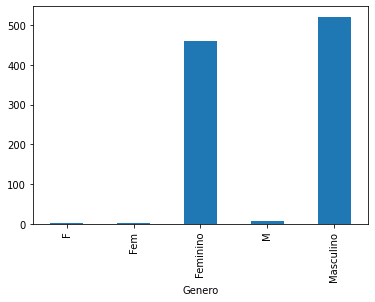

In [9]:
#plotando o gráfico com as entradas da coluna Genero
#dentro dos parênteses é possível escolher a cor color = 'orange'
agrupado_genero.plot.bar()

##Score
###Score é a nota dada pelas instituições sobre o cliente. Levam em conta diversas variáveis como inadimplência, renda, ...

In [10]:
#explorar colunas numéricas
#coluna Score
dataset['Score'].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


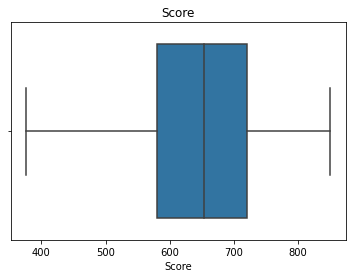

In [11]:
sns.boxplot(dataset['Score']).set_title('Score');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


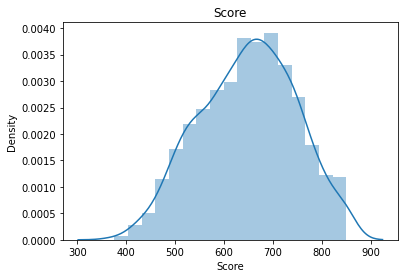

In [12]:
sns.distplot(dataset['Score']).set(title='Score');

##Idade

In [13]:
#trabalhando com a coluna Idade
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

###Note que temos idades abaixo de zero e também extremamente altas (140), o que provavelmente estão erradas, atrapalhando nossa correta análise dos dados.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


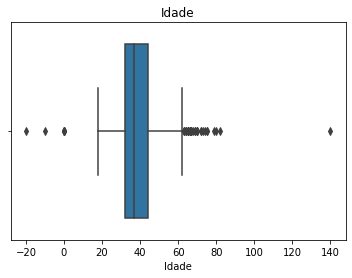

In [14]:
sns.boxplot(dataset.Idade).set(title='Idade');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Idade')]

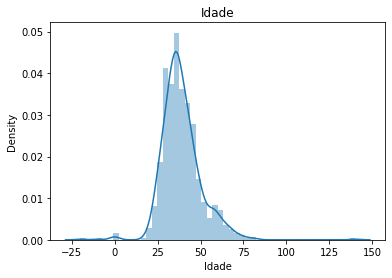

In [15]:
sns.distplot(dataset.Idade).set(title='Idade')

##Saldo

In [16]:
dataset.Saldo.describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


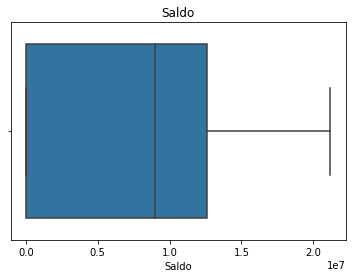

In [17]:
sns.boxplot(dataset.Saldo).set(title='Saldo');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


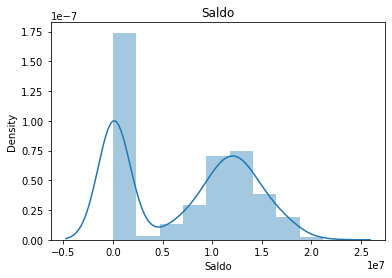

In [18]:
sns.distplot(dataset['Saldo']).set(title='Saldo');

###Perceba a quantidade de resultados que foram encontrados com o valor zerado.

##Salário

In [19]:
dataset.Salario.describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


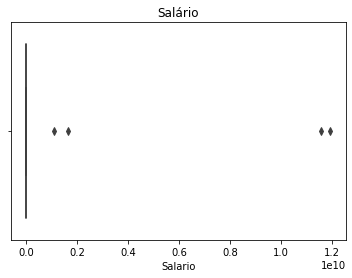

In [20]:
sns.boxplot(dataset.Salario).set(title='Salário');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


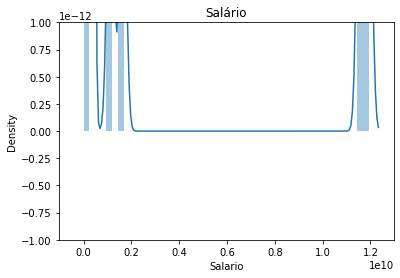

In [21]:
sns.distplot(dataset.Salario).set(title='Salário');

##Valores Ausentes
###Verificando em todo o dataset se há ocorrência de valores ausentes(NA's)

In [22]:
dataset.isnull().sum()

Id                  0
Score               0
Estado              0
Genero              8
Idade               0
Patrimonio          0
Saldo               0
Produtos            0
TemCartaoCredito    0
Ativo               0
Salario             7
Saiu                0
dtype: int64

In [23]:
print(f'Note que temos {dataset.Genero.isnull().sum()} valores nulos na coluna \
Genero e {dataset.Salario.isnull().sum()} valores nulos na coluna Salario.')

Note que temos 8 valores nulos na coluna Genero e 7 valores nulos na coluna Salario.


###Tratamento dos dados faltantes

In [24]:
#mediana dos salários
mediana = sts.median(dataset.Salario)
mediana

70518.0

In [25]:
#substituir valores NA's por mediana
dataset.Salario.fillna(mediana, inplace=True)

In [26]:
#verificando se os valores NA's foram preenchidos
print(f'A coluna Salario agora possui {dataset.Salario.isnull().sum()} dados \
faltantes.')

A coluna Salario agora possui 0 dados faltantes.


###A coluna Genero além dos dados faltantes, temos que padronizar os valores.

In [27]:
#preenchendo os dados NA com o resultado que mais aparece 
dataset.Genero.fillna('Masculino', inplace=True)

In [28]:
#verificando se os dados faltantes foram devidamente preenchidos
print(f'A coluna Genero agora possui {dataset.Genero.isnull().sum()} dados \
faltantes.')

A coluna Genero agora possui 0 dados faltantes.


In [29]:
#padroniza de acordo com o domínio
dataset.loc[dataset.Genero == 'M', 'Genero'] = 'Masculino'
dataset.loc[dataset.Genero.isin(['F', "Fem"]) , 'Genero'] = 'Feminino'

In [30]:
#analisando novamente os dados da coluna Genero
dataset.Genero.value_counts()

Masculino    535
Feminino     464
Name: Genero, dtype: int64

###Pronto! Dados devidamente alterados.

In [31]:
#idades fora do domínio
dataset.Idade.describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [37]:
#visualizar 
dataset.loc[(dataset.Idade < 0) | (dataset.Idade > 10)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,838,SC,Masculino,43,9,12310588,2,1,0,14576583.0,0
995,997,610,SC,Masculino,29,9,0,3,0,1,8391224.0,0
996,998,811,SC,Masculino,44,3,0,2,0,1,7843973.0,0
997,999,587,SC,Masculino,62,7,12128627,1,0,1,677692.0,0


In [50]:
#calcular a mediana
mediana = dataset.Idade.median()
print(f'A mediana da coluna Idade é {mediana}.')

A mediana da coluna Idade é 37.0.


In [51]:
#mediana
dataset.loc[(dataset.Idade < 0) | (dataset.Idade > 110)] = mediana

In [52]:
#verificando se os dados foram alterados
dataset.Idade.describe()

count    999.000000
mean      38.903904
std       10.672421
min        0.000000
25%       32.000000
50%       37.000000
75%       44.000000
max       82.000000
Name: Idade, dtype: float64

##Dados Duplicados

###Buscando pelo Id

In [53]:
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
36,37,490,SC,Masculino,31,3,14526023,1,0,1,11406677.0,0
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
867,37,37,37,37,37,37,37,37,37,37,37.0,37
984,37,37,37,37,37,37,37,37,37,37,37.0,37
990,37,37,37,37,37,37,37,37,37,37,37.0,37


In [56]:
#excluindo pelo Id
dataset.drop_duplicates(subset="Id", keep='first', inplace=True)
#buscando duplicados
dataset[dataset.duplicated(['Id'], keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu


,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartaoCredito,Ativo,Salario,Saiu
